### **Import Library**

In [ ]:
# import sys
# import pkg_resources

# def get_package_version(package_name):
#     """Mencari versi paket yang terinstal."""
#     try:
#         return pkg_resources.get_distribution(package_name).version
#     except pkg_resources.DistributionNotFound:
#         return "Tidak terinstal"
#     except Exception as e:
#         return f"Error: {e}"

# # Daftar paket sesuai requirements.txt Anda
# packages_to_check = [
#     'streamlit',
#     'streamlit-option-menu',
#     'streamlit-antd-components',
#     'streamlit-shadcn-ui',
#     'tensorflow',
#     'pandas',
#     'numpy',
#     'scikit-learn',
#     'Pillow',
#     'plotly',
#     'openpyxl',
#     'matplotlib',
#     'seaborn',
#     'networkx'
# ]

# # Mencetak versi Python
# print("-" * 30)
# print(f"Versi Python: {sys.version.split()[0]}")
# print("-" * 30)

# # Mencetak versi setiap paket
# print("Versi Pustaka (Library):")
# for pkg in sorted(packages_to_check, key=str.lower):
#     version = get_package_version(pkg)
#     # Mencetak dengan format yang rapi
#     print(f"{pkg:<25} : {version}")

# print("-" * 30)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2040\2891969338.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


------------------------------
Versi Python: 3.12.2
------------------------------
Versi Pustaka (Library):
matplotlib                : 3.8.3
networkx                  : 3.3
numpy                     : 1.26.4
openpyxl                  : 3.1.2
pandas                    : 2.2.1
Pillow                    : 10.2.0
plotly                    : 5.24.1
scikit-learn              : 1.4.2
seaborn                   : 0.13.2
streamlit                 : 1.41.1
streamlit-antd-components : 0.3.2
streamlit-option-menu     : 0.3.12
streamlit-shadcn-ui       : 0.1.18
tensorflow                : 2.16.1
------------------------------


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf # Untuk mengatur seed demi reproducibility
import plotly.express as px
import matplotlib.pyplot as plt
import os

### **Import Data Hasil Rules**

In [ ]:
df = pd.read_csv('D:/kuliah/PA/sakinah-mart/data/rules2024.csv')
df.head()

,Unnamed: 0,antecedents,consequents,support,confidence,lift
0,0,"frozenset({'SAKINAH 1500ML', 'GREENFIELDS COKL...",frozenset({'GREENFIELDS STRAW 105ML'}),0.000109,1,4922.846154
1,1,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...","frozenset({'INDOMILK KID VNL 115ML', 'CLOUD 9 ...",0.000141,1,2206.793103
2,2,"frozenset({'GATSBY SPL/C GS 175ML', 'FRESHCARE...",frozenset({'GATSBY SPL/C DO 175ML'}),0.000141,1,1185.129630
3,3,"frozenset({'KISPRAY POUCH GLAM/GLD 300ML', 'IN...",frozenset({'SOKLIN LIQ LAVENDER 625ML'}),0.000109,1,831.129870
4,4,"frozenset({'SEDAAP MIE CUP BASO BLEDUK', 'SEDA...",frozenset({'SEDAAP MIE CUP SOTO'}),0.000125,1,780.451220
5,5,"frozenset({'SEDAAP MIE CUP AYM JERIT /12', 'SE...",frozenset({'SEDAAP MIE CUP SOTO'}),0.000109,1,780.451220
6,6,"frozenset({'ATTACK JAZ 1 CINTA 1 6 KG', 'NUVO ...",frozenset({'NUVO SOAP BLUE 72G'}),0.000109,1,484.825758
7,7,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...",frozenset({'CLOUD 9 VANILA 15 4G'}),0.000141,1,378.680473
8,8,"frozenset({'BISKUAT BOLU CKL 16GR', 'INDOMILK ...",frozenset({'CLOUD 9 VANILA 15 4G'}),0.000141,1,378.680473
9,9,"frozenset({'DELFI TOP TRIP/CHO 9GR', 'MOMOGI J...",frozenset({'DELFI TOP B/WHITE 9GR'}),0.000109,1,353.574586


In [5]:
# Pastikan semua elemen dalam kolom antecedents dan consequents adalah frozenset
df["antecedents"] = df["antecedents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)
df["consequents"] = df["consequents"].apply(lambda x: frozenset(eval(x)) if isinstance(x, str) else x)

# Mengambil semua item unik
all_items = set()
for col in ["antecedents", "consequents"]:
    for items in df[col]:
        all_items.update(items)

all_items

{'ADEM SARI CHINGKU MD LMN 350ML',
 'ATTACK JAZ 1 CINTA 1 6 KG',
 'BISKUAT BOLU CKL 16GR',
 'CLOUD 9 CHOCO 15 4G',
 'CLOUD 9 VANILA 15 4G',
 'DAIA LEMON 65GR',
 'DELFI TOP B/WHITE 9GR',
 'DELFI TOP CHO 9GR',
 'DELFI TOP STR 9GR',
 'DELFI TOP TRIP/CHO 9GR',
 'EKONOMI LIQUID REFF 235ML',
 'FRESHCARE ORIGINAL 10ML',
 'GATSBY SPL/C DO 175ML',
 'GATSBY SPL/C GS 175ML',
 'GREENFIELDS COKLAT 105ML',
 'GREENFIELDS STRAW 105ML',
 'INDOMIE GRG SPECIAL',
 'INDOMIE RAMEN TORI KARA/20',
 'INDOMIE SOTO MIE',
 'INDOMILK KID CKL 115ML',
 'INDOMILK KID STR 115ML',
 'INDOMILK KID VNL 115ML',
 'KISPRAY POUCH GLAM/GLD 300ML',
 'MAMA LEMON 115ML',
 'MOMOGI JGG BKR 6GR',
 'MR POTATO CRIPS ORI 35G',
 'NEXTAR BROWNIES 42GR',
 'NEXTAR PINEAPLE 112G',
 'NUVO SOAP BLUE 72G',
 'NUVO SOAP RED 72G',
 'ROMA KELAPA 300GR',
 'SAKINAH 1500ML',
 'SEDAAP MIE AYAM BWG',
 'SEDAAP MIE CUP AYM JERIT /12',
 'SEDAAP MIE CUP BASO BLEDUK',
 'SEDAAP MIE CUP BASO SPC',
 'SEDAAP MIE CUP KARE',
 'SEDAAP MIE CUP SOTO',
 'SEDAAP MIE S

### **Import Data Transaksi**

In [6]:
groceries = pd.read_excel('D:/kuliah/PA/sakinah-mart/data/final_data2024.xlsx')
groceries.head()

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
0,2024-01-01,2401011010001,GULA ROSE BRAND 1KG,1
1,2024-01-01,2401011010002,RIZKI MG 850ML/900ML BTL,3
2,2024-01-01,2401011010003,ULTRA MIMI VNL 125ML,1
3,2024-01-01,2401011010003,BEAR BRAND 189ML,1
4,2024-01-01,2401011010003,TINI WINI BITI ASIN 20 GR,1
...,...,...,...,...
167618,2024-12-31,2412311020122,WALLS POPULAIRE CKL,1
167619,2024-12-31,2412311020123,THERMAL 80X50 TRUST PAPER,1
167620,2024-12-31,2412311020124,SAKINAH 600ML,1
167621,2024-12-31,2412311020124,WALLS PP RAINBOW P,1


### **Filter Data Transaksi**

In [7]:
df_filtered = groceries[groceries['NAMA BARANG'].isin(all_items)]
df_filtered 

,TANGGAL,NO TRANSAKSI,NAMA BARANG,QTY
20,2024-01-01,2401011010011,INDOMIE GRG SPECIAL,1
32,2024-01-01,2401011010015,EKONOMI LIQUID REFF 235ML,1
55,2024-01-01,2401011010017,ROMA KELAPA 300GR,1
59,2024-01-01,2401011010018,INDOMILK KID VNL 115ML,1
73,2024-01-01,2401011010023,ROMA KELAPA 300GR,1
...,...,...,...,...
167537,2024-12-31,2412311020090,INDOMILK KID CKL 115ML,1
167552,2024-12-31,2412311020096,INDOMIE RAMEN TORI KARA/20,1
167607,2024-12-31,2412311020118,INDOMILK KID STR 115ML,1
167608,2024-12-31,2412311020118,INDOMILK KID VNL 115ML,1


In [8]:
# Menampilkan jumlah unik nama barang
jumlah_nama_barang = df_filtered['NAMA BARANG'].nunique()
print("Jumlah nama barang unik:", jumlah_nama_barang)

# Menampilkan isi nama barang yang unik
nama_barang_unik = df_filtered['NAMA BARANG'].unique()
print("Nama barang unik:")
for nama in nama_barang_unik:
    print("-", nama)

Jumlah nama barang unik: 45
Nama barang unik:
- INDOMIE GRG SPECIAL
- EKONOMI LIQUID REFF 235ML
- ROMA KELAPA 300GR
- INDOMILK KID VNL 115ML
- SEDAAP MIE AYAM BWG
- SEDAAP MIE SOTO
- ATTACK JAZ 1 CINTA 1 6 KG
- WALLS POPULAIRE CKL
- MAMA LEMON 115ML
- WALLS CORN STRW VANILA
- DELFI TOP CHO 9GR
- DELFI TOP STR 9GR
- DELFI TOP B/WHITE 9GR
- SEDAAP MIE CUP SOTO
- SEDAAP MIE CUP KARE
- DELFI TOP TRIP/CHO 9GR
- DAIA LEMON 65GR
- NUVO SOAP RED 72G
- NUVO SOAP BLUE 72G
- SEDAAP MIE CUP AYM JERIT /12
- SEDAAP MIE CUP BASO BLEDUK
- WALLS CORN B/WHITE 82GR
- BISKUAT BOLU CKL 16GR
- INDOMIE SOTO MIE
- SOKLIN LIQ LAVENDER 625ML
- INDOMILK KID STR 115ML
- WALLS POPULAIRE STR
- SAKINAH 1500ML
- KISPRAY POUCH GLAM/GLD 300ML
- MR POTATO CRIPS ORI 35G
- INDOMILK KID CKL 115ML
- GATSBY SPL/C DO 175ML
- GATSBY SPL/C GS 175ML
- FRESHCARE ORIGINAL 10ML
- INDOMIE RAMEN TORI KARA/20
- NEXTAR BROWNIES 42GR
- CLOUD 9 VANILA 15 4G
- TEH GELAS ORI 170ML
- CLOUD 9 CHOCO 15 4G
- NEXTAR PINEAPLE 112G
- SEDAAP MIE C

### **Agregasi Data Mingguan**

In [9]:
# Agregasi jumlah QTY per tanggal dan nama barang
df_grouped = df_filtered.groupby(['TANGGAL', 'NAMA BARANG'], as_index=False)['QTY'].sum()

tanggal_range = pd.date_range(start='2024-01-01', end='2024-12-31')
all_items = df_filtered['NAMA BARANG'].unique()

# Buat kombinasi semua tanggal dan item
multi_index = pd.MultiIndex.from_product([tanggal_range, all_items], names=['TANGGAL', 'NAMA BARANG'])
all_combinations = pd.DataFrame(index=multi_index).reset_index()

# Gabungkan dengan hasil groupby
df_joined = pd.merge(all_combinations, df_grouped, on=['TANGGAL', 'NAMA BARANG'], how='left')
df_joined['QTY'] = df_joined['QTY'].fillna(0)

# Pastikan TANGGAL dalam datetime
df_joined['TANGGAL'] = pd.to_datetime(df_joined['TANGGAL'])

# Urutkan dulu datanya
df_joined = df_joined.sort_values('TANGGAL')

# Ambil tanggal paling awal
start_date = df_joined['TANGGAL'].min()

# Hitung minggu ke-n secara manual (tiap 7 hari)
df_joined['WEEK_NUMBER'] = ((df_joined['TANGGAL'] - start_date).dt.days // 7) + 1

# Agregasi berdasarkan minggu dan nama barang
df_weekly = df_joined.groupby(['WEEK_NUMBER', 'NAMA BARANG'], as_index=False)['QTY'].sum()

# (Opsional) Tambahkan kolom tanggal mulai minggu
df_weekly['TANGGAL'] = start_date + pd.to_timedelta((df_weekly['WEEK_NUMBER'] - 1) * 7, unit='D')

# Visualisasi
fig = px.line(df_weekly, x='TANGGAL', y='QTY', color='NAMA BARANG',
              title='Jumlah Penjualan per Minggu (Setiap 7 Hari)')
fig.update_layout(legend_title_text='Klik untuk tampilkan/sembunyikan item')
fig.show()

In [10]:
df_weekly

,WEEK_NUMBER,NAMA BARANG,QTY,TANGGAL
0,1,ADEM SARI CHINGKU MD LMN 350ML,0.0,2024-01-01
1,1,ATTACK JAZ 1 CINTA 1 6 KG,10.0,2024-01-01
2,1,BISKUAT BOLU CKL 16GR,5.0,2024-01-01
3,1,CLOUD 9 CHOCO 15 4G,3.0,2024-01-01
4,1,CLOUD 9 VANILA 15 4G,4.0,2024-01-01
...,...,...,...,...
2380,53,TEH GELAS ORI 170ML,0.0,2024-12-30
2381,53,WALLS CORN B/WHITE 82GR,0.0,2024-12-30
2382,53,WALLS CORN STRW VANILA,0.0,2024-12-30
2383,53,WALLS POPULAIRE CKL,9.0,2024-12-30


### **Pivot Data**

In [11]:
df_pivoted= df_weekly.pivot(index='TANGGAL', columns='NAMA BARANG', values='QTY')
df_pivoted.columns.name = None  # hilangkan nama kolom atas
df_pivoted = df_pivoted.reset_index() 
df_pivoted

,TANGGAL,ADEM SARI CHINGKU MD LMN 350ML,ATTACK JAZ 1 CINTA 1 6 KG,BISKUAT BOLU CKL 16GR,CLOUD 9 CHOCO 15 4G,CLOUD 9 VANILA 15 4G,DAIA LEMON 65GR,DELFI TOP B/WHITE 9GR,DELFI TOP CHO 9GR,DELFI TOP STR 9GR,...,SEDAAP MIE CUP BASO SPC,SEDAAP MIE CUP KARE,SEDAAP MIE CUP SOTO,SEDAAP MIE SOTO,SOKLIN LIQ LAVENDER 625ML,TEH GELAS ORI 170ML,WALLS CORN B/WHITE 82GR,WALLS CORN STRW VANILA,WALLS POPULAIRE CKL,WALLS POPULAIRE STR
0,2024-01-01,0.0,10.0,5.0,3.0,4.0,5.0,6.0,8.0,5.0,...,0.0,2.0,5.0,38.0,2.0,3.0,17.0,2.0,10.0,4.0
1,2024-01-08,10.0,0.0,4.0,7.0,1.0,2.0,7.0,4.0,4.0,...,2.0,3.0,1.0,16.0,2.0,5.0,12.0,4.0,3.0,4.0
2,2024-01-15,8.0,0.0,7.0,5.0,7.0,0.0,3.0,1.0,3.0,...,2.0,3.0,2.0,20.0,0.0,4.0,3.0,0.0,7.0,7.0
3,2024-01-22,2.0,1.0,5.0,5.0,7.0,2.0,4.0,2.0,0.0,...,2.0,2.0,0.0,32.0,1.0,10.0,22.0,5.0,7.0,6.0
4,2024-01-29,0.0,5.0,0.0,10.0,7.0,3.0,9.0,10.0,5.0,...,2.0,0.0,2.0,16.0,2.0,9.0,8.0,2.0,8.0,5.0
5,2024-02-05,2.0,0.0,1.0,10.0,6.0,5.0,3.0,10.0,2.0,...,2.0,0.0,3.0,24.0,1.0,4.0,15.0,1.0,4.0,6.0
6,2024-02-12,1.0,0.0,0.0,3.0,2.0,3.0,4.0,5.0,6.0,...,2.0,3.0,2.0,16.0,0.0,5.0,3.0,2.0,9.0,7.0
7,2024-02-19,4.0,0.0,2.0,1.0,5.0,3.0,1.0,6.0,12.0,...,0.0,3.0,1.0,22.0,2.0,8.0,9.0,3.0,5.0,7.0
8,2024-02-26,1.0,6.0,3.0,2.0,3.0,0.0,6.0,17.0,9.0,...,2.0,3.0,3.0,20.0,2.0,6.0,6.0,3.0,5.0,2.0
9,2024-03-04,2.0,3.0,3.0,7.0,7.0,17.0,4.0,2.0,9.0,...,0.0,3.0,4.0,11.0,4.0,4.0,5.0,1.0,5.0,13.0


In [12]:
# 1. Pisahkan kolom tanggal dan kolom produk
produk_df = df_pivoted.drop(columns=["TANGGAL"])

# 2. Hitung jumlah 0 per kolom
zero_counts = (produk_df == 0).sum()

# 3. Ambil item yang jumlah 0-nya <= 5
filtered_items = zero_counts[zero_counts <= 5].index

# 4. Filter dataframe hanya dengan item yang lolos kriteria 0
filtered_df = produk_df[filtered_items]

# 5. Hitung total penjualan per item
total_sales = filtered_df.sum().sort_values(ascending=False).index

# 6. Ambil 15 item dengan total penjualan tertinggi
# top_3_items = total_sales.head(15).index

# 7. Final dataframe dengan 15 item terbaik
df_final = df_pivoted[["TANGGAL"] + total_sales.tolist()]

In [13]:
df_final.head()

,TANGGAL,INDOMIE GRG SPECIAL,INDOMILK KID CKL 115ML,SEDAAP MIE SOTO,SAKINAH 1500ML,INDOMILK KID VNL 115ML,INDOMILK KID STR 115ML,INDOMIE SOTO MIE,SEDAAP MIE AYAM BWG,EKONOMI LIQUID REFF 235ML,WALLS CORN B/WHITE 82GR,WALLS POPULAIRE CKL,WALLS POPULAIRE STR,MAMA LEMON 115ML,DELFI TOP CHO 9GR,ROMA KELAPA 300GR,DELFI TOP B/WHITE 9GR,BISKUAT BOLU CKL 16GR,DELFI TOP STR 9GR
0,2024-01-01,129.0,3.0,38.0,6.0,8.0,3.0,18.0,14.0,9.0,17.0,10.0,4.0,3.0,8.0,12.0,6.0,5.0,5.0
1,2024-01-08,119.0,12.0,16.0,6.0,13.0,14.0,13.0,1.0,6.0,12.0,3.0,4.0,6.0,4.0,8.0,7.0,4.0,4.0
2,2024-01-15,88.0,13.0,20.0,5.0,10.0,10.0,16.0,9.0,4.0,3.0,7.0,7.0,7.0,1.0,6.0,3.0,7.0,3.0
3,2024-01-22,147.0,18.0,32.0,8.0,14.0,16.0,19.0,3.0,6.0,22.0,7.0,6.0,8.0,2.0,3.0,4.0,5.0,0.0
4,2024-01-29,114.0,20.0,16.0,4.0,19.0,22.0,15.0,5.0,11.0,8.0,8.0,5.0,7.0,10.0,6.0,9.0,0.0,5.0


In [14]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TANGGAL                    53 non-null     datetime64[ns]
 1   INDOMIE GRG SPECIAL        53 non-null     float64       
 2   INDOMILK KID CKL 115ML     53 non-null     float64       
 3   SEDAAP MIE SOTO            53 non-null     float64       
 4   SAKINAH 1500ML             53 non-null     float64       
 5   INDOMILK KID VNL 115ML     53 non-null     float64       
 6   INDOMILK KID STR 115ML     53 non-null     float64       
 7   INDOMIE SOTO MIE           53 non-null     float64       
 8   SEDAAP MIE AYAM BWG        53 non-null     float64       
 9   EKONOMI LIQUID REFF 235ML  53 non-null     float64       
 10  WALLS CORN B/WHITE 82GR    53 non-null     float64       
 11  WALLS POPULAIRE CKL        53 non-null     float64       
 12  WALLS POPU

In [15]:
# Ubah kolom TANGGAL menjadi datetime
df_final["TANGGAL"] = pd.to_datetime(df_final["TANGGAL"])

# Ubah dari wide ke long format agar cocok untuk plotly express
df_long = df_final.melt(id_vars="TANGGAL", var_name="NAMA BARANG", value_name="QTY")

# Buat line chart
fig = px.line(
    df_long,
    x="TANGGAL",
    y="QTY",
    color="NAMA BARANG",
    title="Jumlah Penjualan per Minggu per Item",
    markers=True,
    labels={"TANGGAL": "Tanggal", "QTY": "Jumlah Terjual", "NAMA BARANG": "Nama Produk"},
    hover_data={"TANGGAL": True, "QTY": True, "NAMA BARANG": True}
)

# Layout tambahan
fig.update_layout(
    legend_title_text='Klik nama produk untuk tampilkan/sembunyikan',
    xaxis_title='Tanggal',
    yaxis_title='Jumlah Terjual',
    template='plotly_white',
    height=500,
    width=900
)

fig.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17120\2313548066.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   TANGGAL                    53 non-null     datetime64[ns]
 1   INDOMIE GRG SPECIAL        53 non-null     float64       
 2   INDOMILK KID CKL 115ML     53 non-null     float64       
 3   SEDAAP MIE SOTO            53 non-null     float64       
 4   SAKINAH 1500ML             53 non-null     float64       
 5   INDOMILK KID VNL 115ML     53 non-null     float64       
 6   INDOMILK KID STR 115ML     53 non-null     float64       
 7   INDOMIE SOTO MIE           53 non-null     float64       
 8   SEDAAP MIE AYAM BWG        53 non-null     float64       
 9   EKONOMI LIQUID REFF 235ML  53 non-null     float64       
 10  WALLS CORN B/WHITE 82GR    53 non-null     float64       
 11  WALLS POPULAIRE CKL        53 non-null     float64       
 12  WALLS POPU

In [17]:
# Mengubah kolom TANGGAL menjadi datetime dan menjadikannya index
df_final['TANGGAL'] = pd.to_datetime(df_final['TANGGAL'])
df_final= df_final.set_index('TANGGAL')
df_final = df_final.asfreq('W-MON') # Menetapkan frekuensi mingguan (Senin)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17120\1928029137.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



             MEMULAI FORECASTING DENGAN LSTM RNN DAN EVALUASI             
Total data historis: 53 titik.
Ukuran data training (80%): 42 titik.
Ukuran data testing (20%): 11 titik.
Look-back window (jumlah langkah input): 5
Batch Size: 8
Recurrent Dropout: 0.2




--- Memproses Produk: INDOMIE GRG SPECIAL ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 24.64
  - RMSE: 30.20
  - MAPE: 32.71%


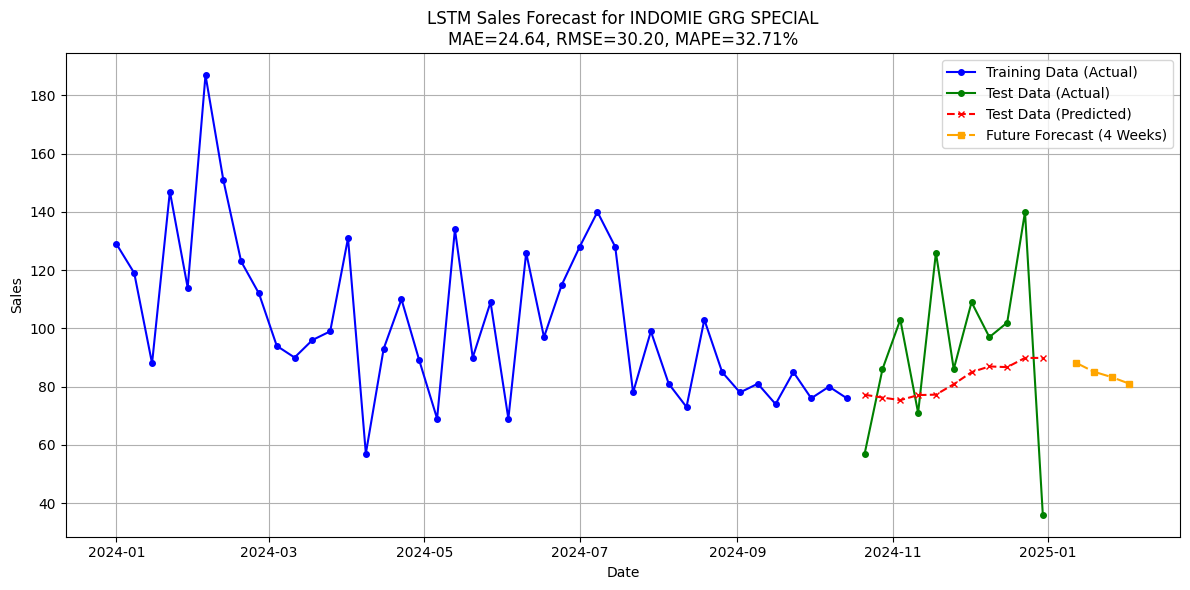


--- Memproses Produk: INDOMILK KID CKL 115ML ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 13.86
  - RMSE: 15.83
  - MAPE: 32.11%


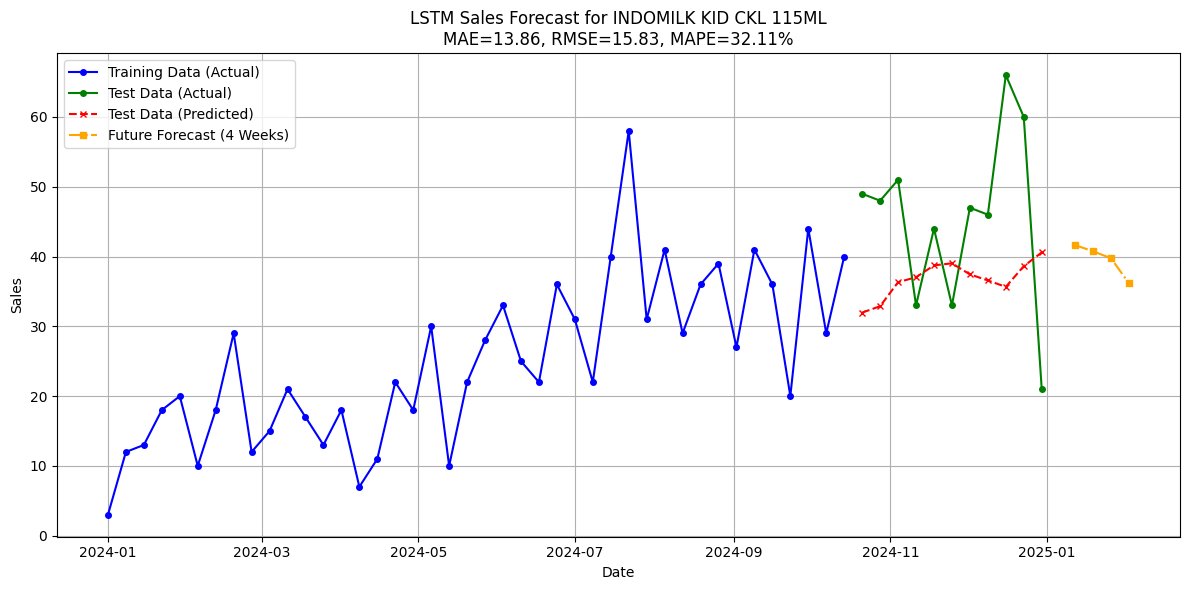


--- Memproses Produk: SEDAAP MIE SOTO ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 7.19
  - RMSE: 8.40
  - MAPE: 50.19%


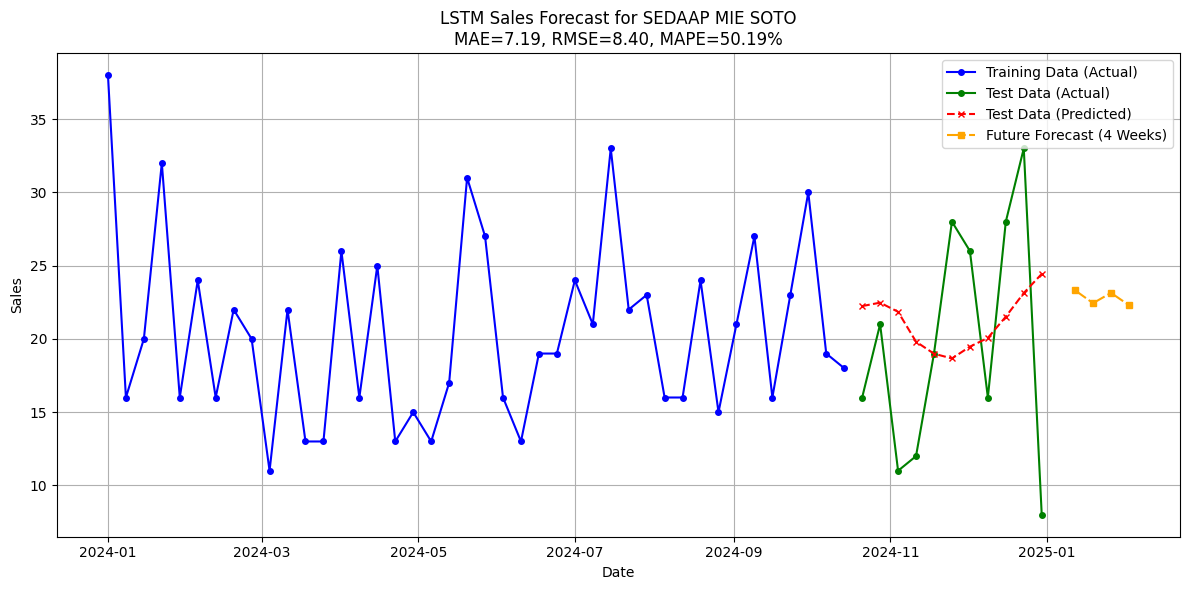


--- Memproses Produk: SAKINAH 1500ML ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 11.43
  - RMSE: 14.47
  - MAPE: 40.16%


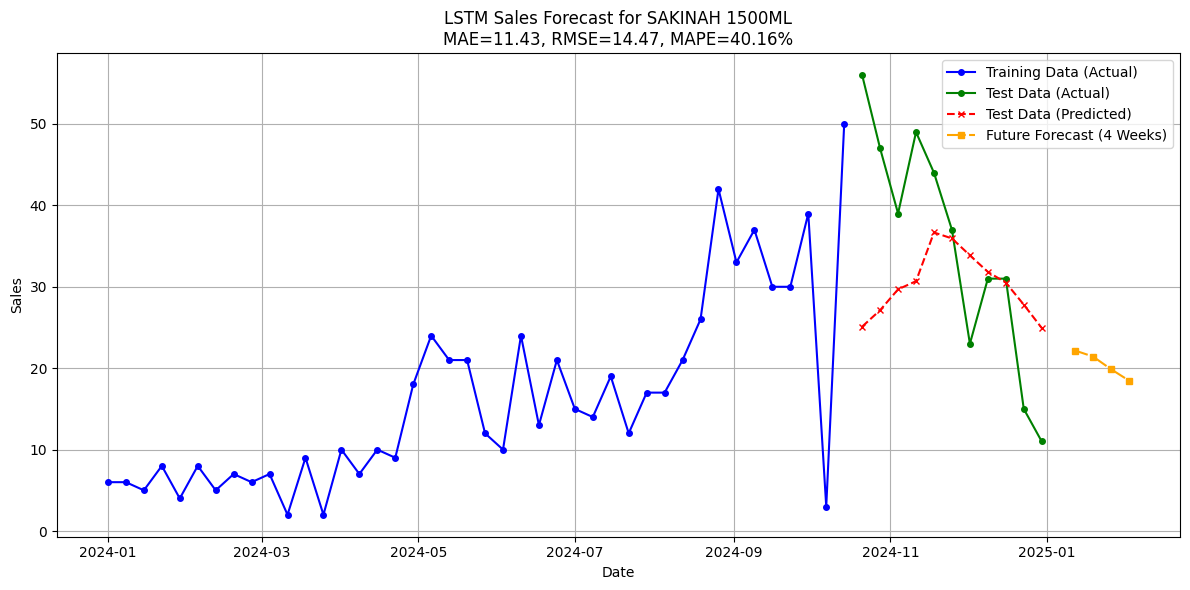


--- Memproses Produk: INDOMILK KID VNL 115ML ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 6.18
  - RMSE: 7.50
  - MAPE: 102.41%


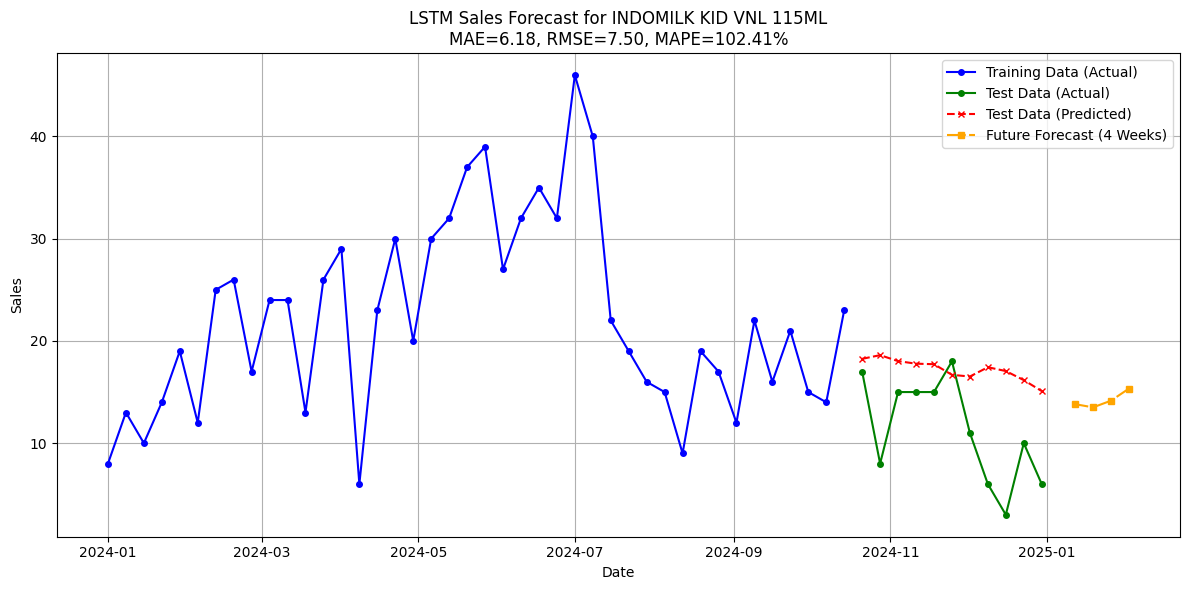


--- Memproses Produk: INDOMILK KID STR 115ML ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 4.70
  - RMSE: 5.48
  - MAPE: 63.70%


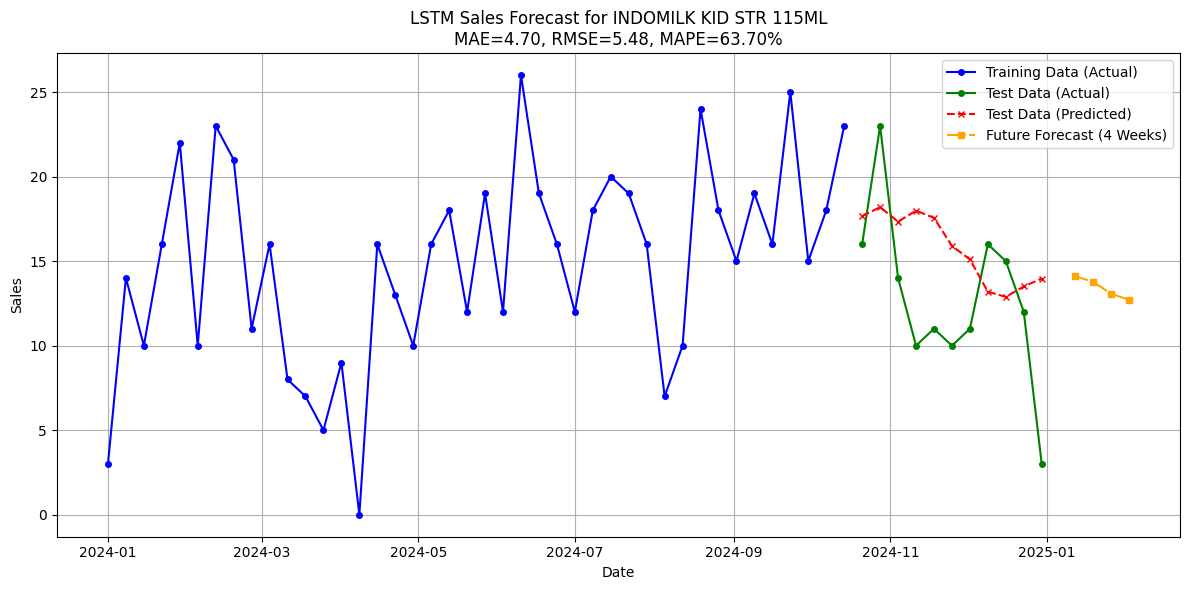


--- Memproses Produk: INDOMIE SOTO MIE ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 7.22
  - RMSE: 8.09
  - MAPE: 46.52%


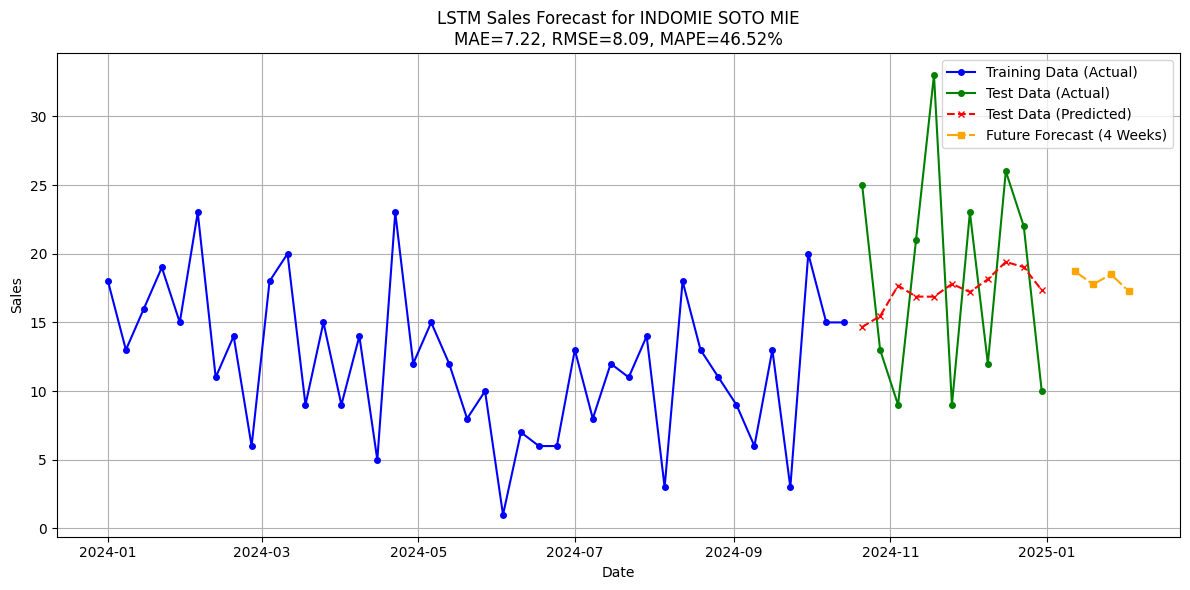


--- Memproses Produk: SEDAAP MIE AYAM BWG ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 2.31
  - RMSE: 2.68
  - MAPE: 56.29%


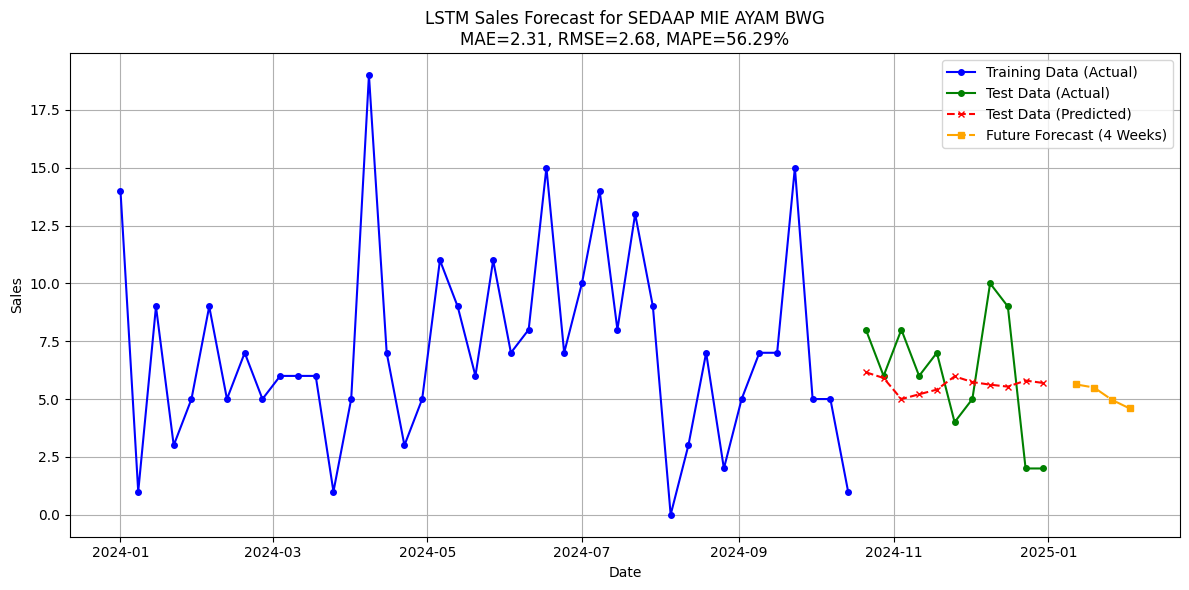


--- Memproses Produk: EKONOMI LIQUID REFF 235ML ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 3.32
  - RMSE: 4.12
  - MAPE: 98.21%


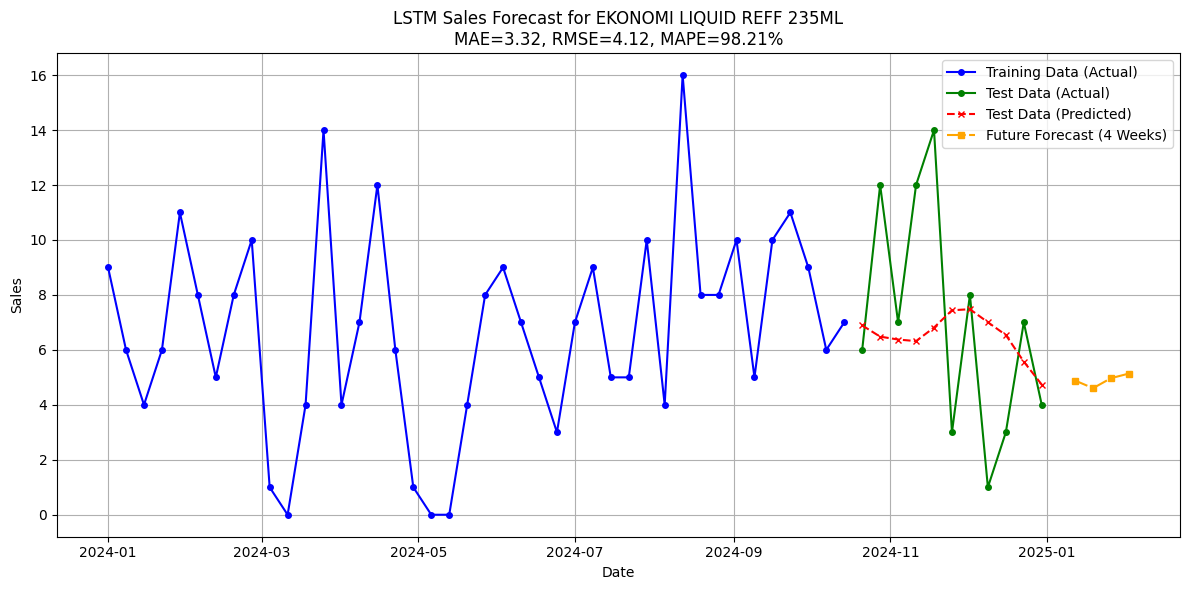


--- Memproses Produk: WALLS CORN B/WHITE 82GR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 3.07
  - RMSE: 4.57
  - MAPE: 70.88%


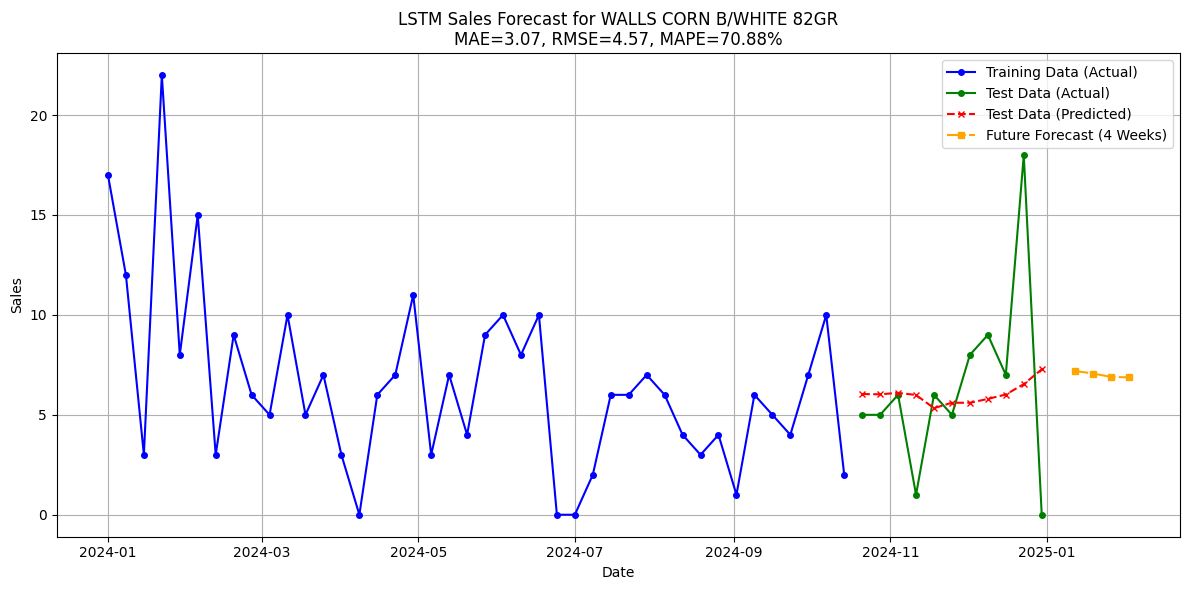


--- Memproses Produk: WALLS POPULAIRE CKL ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 2.06
  - RMSE: 2.60
  - MAPE: 29.37%


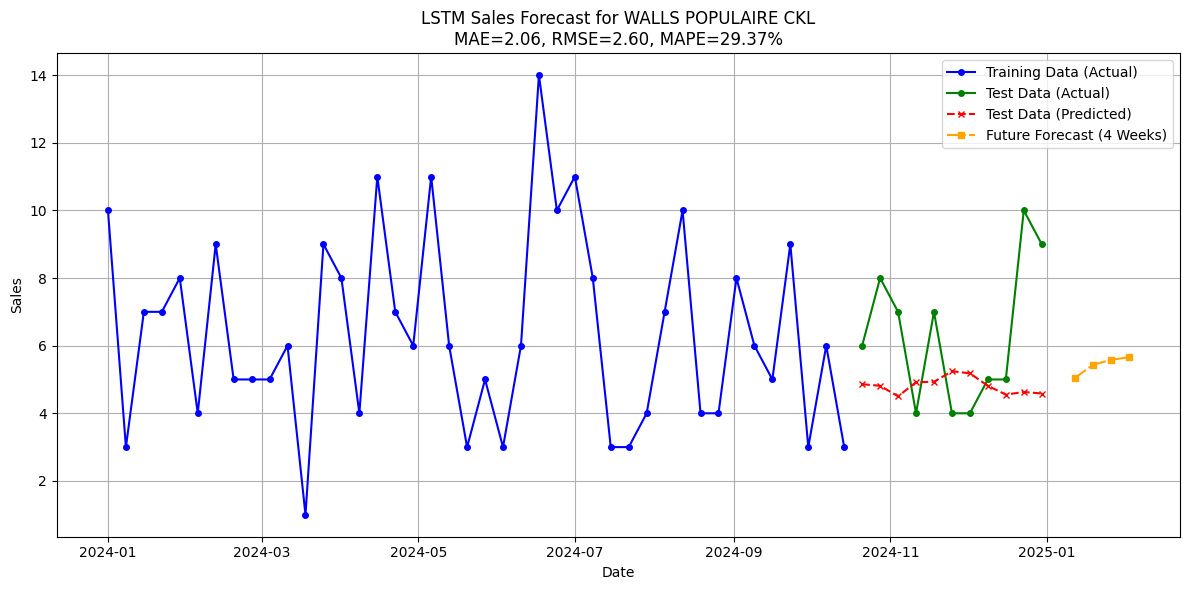


--- Memproses Produk: WALLS POPULAIRE STR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 2.23
  - RMSE: 2.93
  - MAPE: 69.64%


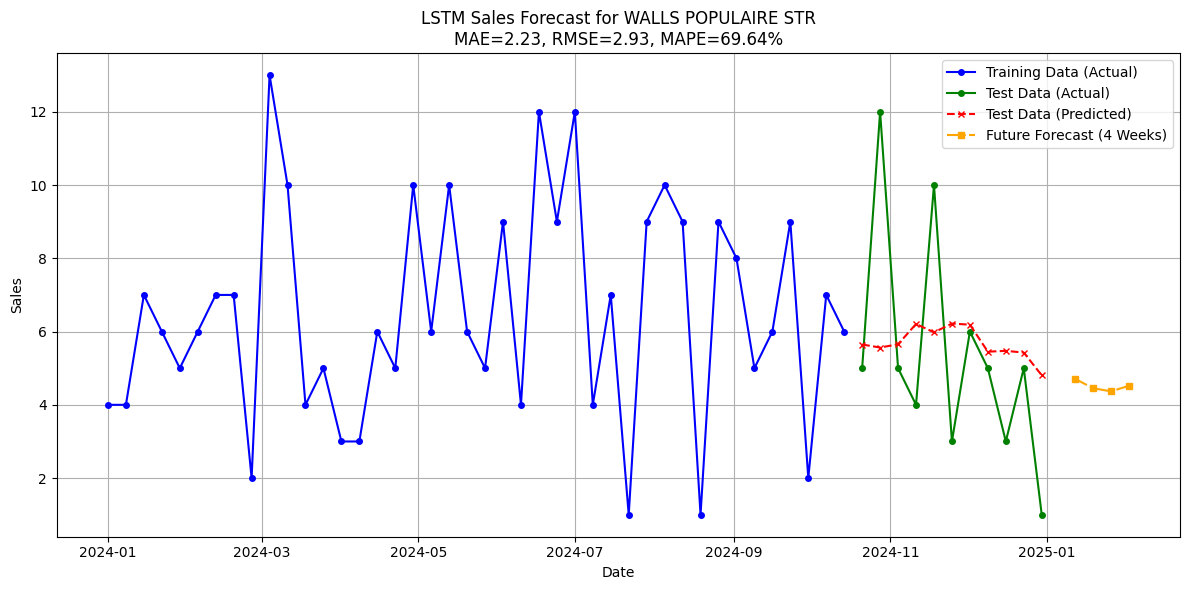


--- Memproses Produk: MAMA LEMON 115ML ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 1.48
  - RMSE: 2.40
  - MAPE: 45.38%


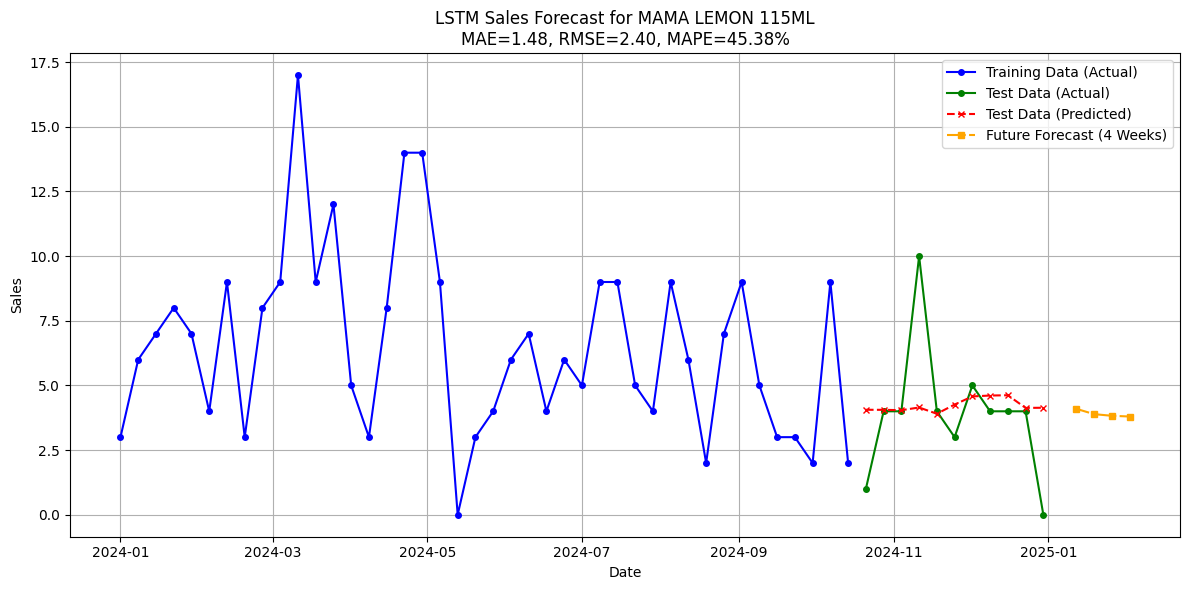


--- Memproses Produk: DELFI TOP CHO 9GR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 1.97
  - RMSE: 2.34
  - MAPE: 46.04%


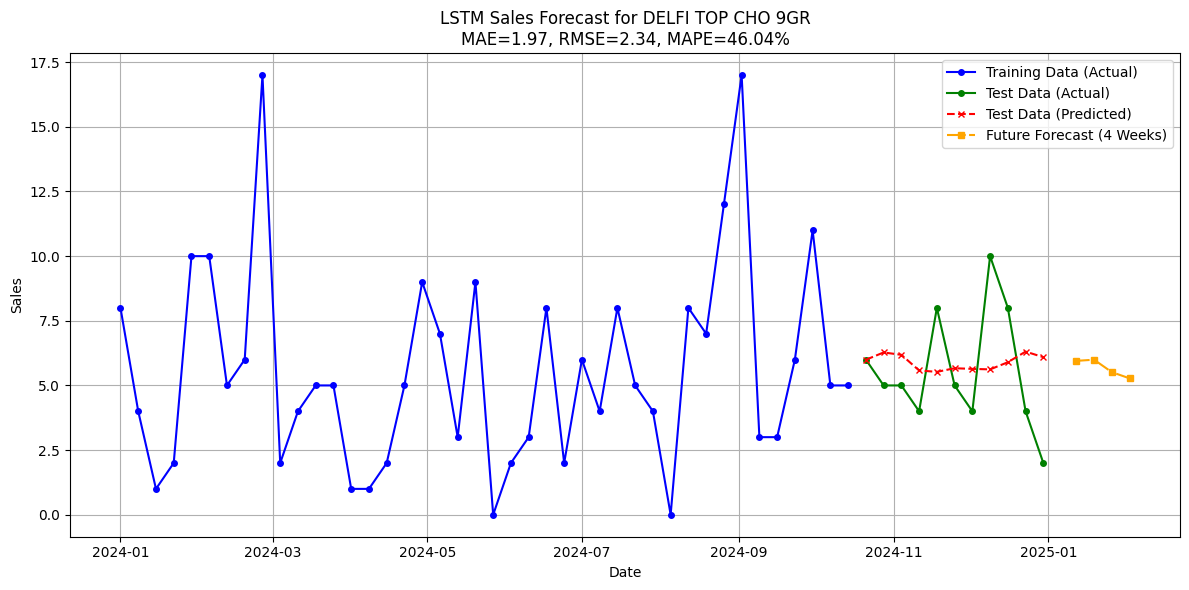


--- Memproses Produk: ROMA KELAPA 300GR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 2.74
  - RMSE: 3.47
  - MAPE: 94.31%


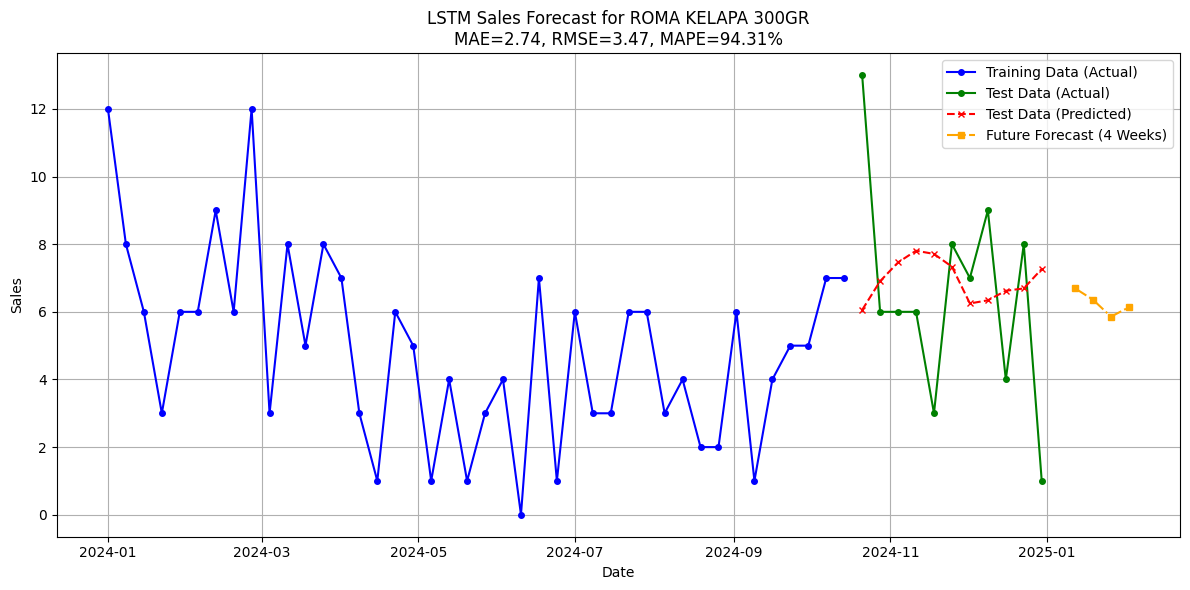


--- Memproses Produk: DELFI TOP B/WHITE 9GR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 2.99
  - RMSE: 3.33
  - MAPE: 107.24%


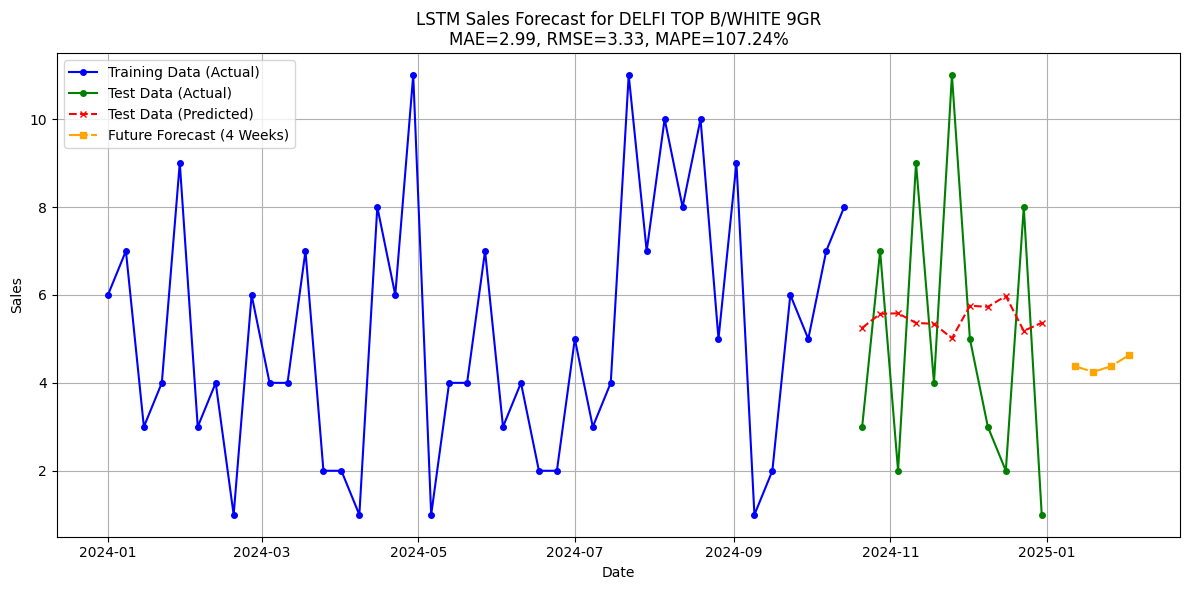


--- Memproses Produk: BISKUAT BOLU CKL 16GR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 3.50
  - RMSE: 4.22
  - MAPE: 53.82%


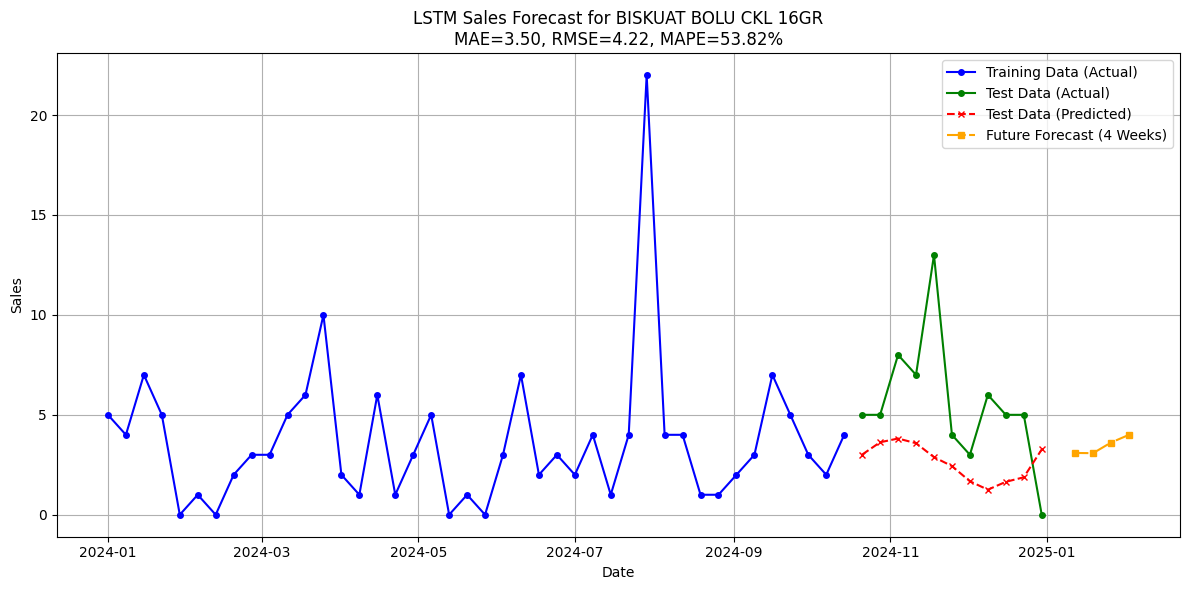


--- Memproses Produk: DELFI TOP STR 9GR ---


c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



  - MAE: 1.77
  - RMSE: 2.55
  - MAPE: 56.85%


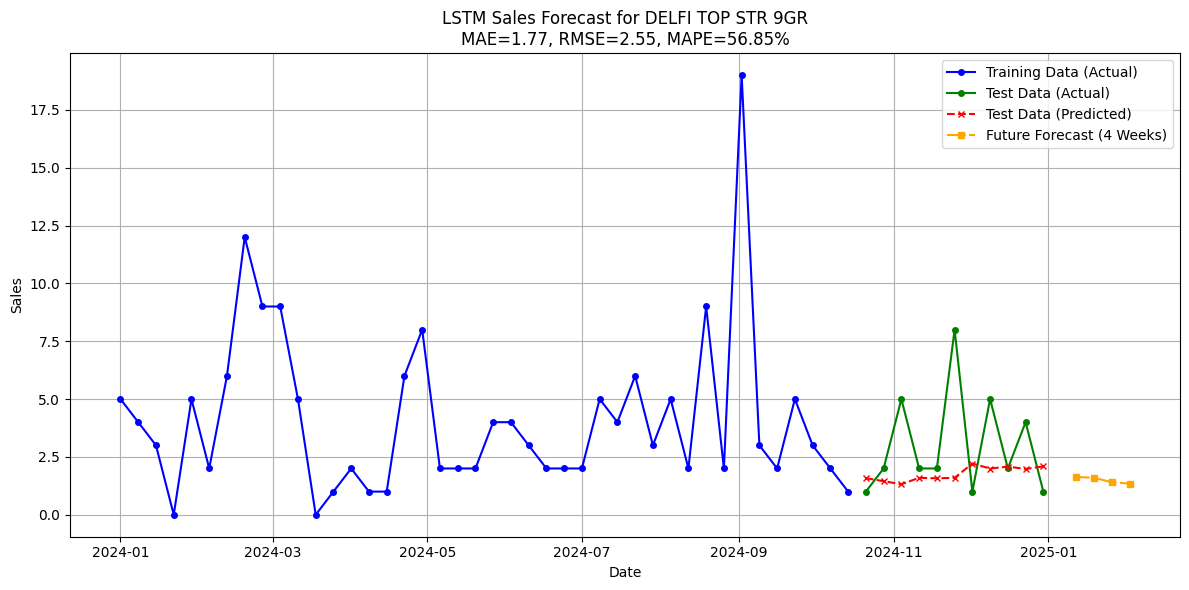



             PROSES FORECASTING DAN EVALUASI SELESAI             

--- Ringkasan Hasil Evaluasi Model (Produk dengan Akurasi Terbaik ke Terjelek) ---
                                 MAE       RMSE        MAPE
WALLS POPULAIRE CKL         2.059690   2.599341   29.374148
INDOMILK KID CKL 115ML     13.859109  15.828419   32.110341
INDOMIE GRG SPECIAL        24.636643  30.204589   32.706099
SAKINAH 1500ML             11.427389  14.470296   40.160994
MAMA LEMON 115ML            1.481006   2.398665   45.384620
DELFI TOP CHO 9GR           1.973651   2.344620   46.044646
INDOMIE SOTO MIE            7.215824   8.092175   46.520275
SEDAAP MIE SOTO             7.190690   8.396901   50.191433
BISKUAT BOLU CKL 16GR       3.497085   4.219485   53.823361
SEDAAP MIE AYAM BWG         2.306400   2.684646   56.285589
DELFI TOP STR 9GR           1.768313   2.546546   56.854093
INDOMILK KID STR 115ML      4.703908   5.480044   63.697307
WALLS POPULAIRE STR         2.229792   2.934057   69.643431
WALLS CO

In [18]:
# Set seed untuk reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Menonaktifkan pesan log TensorFlow yang tidak perlu
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # Mute INFO dan WARNING

# --- Pra-Pemrosesan Data ---
# Kode ini sudah baik, tidak perlu diubah kecuali ada kebutuhan spesifik
if df_final.index.name == 'TANGGAL':
    df_final = df_final.reset_index()
    df_final.rename(columns={'index': 'TANGGAL'}, inplace=True)
elif 'TANGGAL' not in df_final.columns:
    df_final = df_final.reset_index()
    df_final.rename(columns={df_final.columns[0]: 'TANGGAL'}, inplace=True)

df_final['TANGGAL'] = pd.to_datetime(df_final['TANGGAL'])
product_columns = [col for col in df_final.columns if col != 'TANGGAL']

for col in product_columns:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')
    df_final[col] = df_final[col].fillna(0)
    df_final[col] = np.maximum(0, df_final[col])

# --- Fungsi untuk Menghitung Metrik ---
# Kode ini sudah baik, tidak perlu diubah
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))

    # Calculate MAPE only for non-zero actual values
    non_zero_indices = y_true != 0
    if np.sum(non_zero_indices) > 0:
        mape = np.mean(np.abs((y_true[non_zero_indices] - y_pred[non_zero_indices]) / y_true[non_zero_indices])) * 100
    else:
        mape = np.nan # Jika semua nilai aktual adalah 0, MAPE tidak terdefinisi

    return mae, rmse, mape

# --- Fungsi untuk Membuat Urutan Data untuk RNN ---
# Kode ini sudah baik, tidak perlu diubah
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

# --- Hyperparameter RNN (DIUBAH) ---
LOOK_BACK = 5
LSTM_UNITS = 50 # Tetap 50, atau bisa dicoba 32/64
EPOCHS = 200 # Sedikit dinaikkan, tapi early stopping akan menghentikan jika konvergen
BATCH_SIZE = 8 # <-- INI PERUBAHAN UTAMA: Ditingkatkan dari 1 menjadi 8 (atau 16, 32)
FORECAST_HORIZON = 4
RECURRENT_DROPOUT = 0.2 # Dropout untuk unit rekuren

# --- Persiapan untuk Forecasting ---
evaluation_results = {}
future_forecasts_data_list = []

train_size = int(len(df_final) * 0.8)
test_size = len(df_final) - train_size

print("="*80)
print("             MEMULAI FORECASTING DENGAN LSTM RNN DAN EVALUASI             ")
print("="*80)
print(f"Total data historis: {len(df_final)} titik.")
print(f"Ukuran data training (80%): {train_size} titik.")
print(f"Ukuran data testing (20%): {test_size} titik.")
print(f"Look-back window (jumlah langkah input): {LOOK_BACK}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Recurrent Dropout: {RECURRENT_DROPOUT}")
print("\n")

for product in product_columns:
    # Membersihkan sesi Keras untuk memastikan model baru diinisialisasi
    tf.keras.backend.clear_session()

    print(f"\n--- Memproses Produk: {product} ---")

    product_series = df_final[product].values.reshape(-1, 1)

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(product_series)

    # Memastikan ada cukup data untuk training dan testing setelah look_back
    if train_size <= LOOK_BACK + 1 or test_size < 1:
        print(f"  Peringatan: Data tidak cukup untuk look_back ({LOOK_BACK}) atau test set terlalu kecil. Melewatkan produk.")
        evaluation_results[product] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan}
        future_forecasts_data_list.append(np.full(FORECAST_HORIZON, np.nan))
        continue

    train_scaled = scaled_data[:train_size]
    # Test data perlu mencakup LOOK_BACK dari data training sebelumnya
    test_scaled_with_history = scaled_data[train_size - LOOK_BACK:]

    # Memastikan X_train, y_train tidak kosong
    if len(train_scaled) <= LOOK_BACK:
        print(f"  Peringatan: Data training tidak cukup untuk membuat urutan. Melewatkan produk.")
        evaluation_results[product] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan}
        future_forecasts_data_list.append(np.full(FORECAST_HORIZON, np.nan))
        continue

    X_train, y_train = create_sequences(train_scaled, LOOK_BACK)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

    # Memastikan X_test, y_test_actual_scaled tidak kosong
    if len(test_scaled_with_history) <= LOOK_BACK:
        print(f"  Peringatan: Data testing tidak cukup untuk membuat urutan. Melewatkan produk.")
        evaluation_results[product] = {'MAE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan}
        future_forecasts_data_list.append(np.full(FORECAST_HORIZON, np.nan))
        continue

    X_test, y_test_actual_scaled = create_sequences(test_scaled_with_history, LOOK_BACK)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    # Model RNN (DIUBAH)
    model = Sequential()
    # Hapus activation='relu' dan tambahkan recurrent_dropout
    model.add(LSTM(LSTM_UNITS, recurrent_dropout=RECURRENT_DROPOUT, input_shape=(LOOK_BACK, 1))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=0) # Patience dinaikkan sedikit

    # Melatih model
    history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0,
                        validation_split=0.1, callbacks=[early_stopping])

    # Membuat prediksi pada data test
    y_pred_scaled = model.predict(X_test, verbose=0)
    y_pred_unscaled = scaler.inverse_transform(y_pred_scaled)
    y_test_actual_unscaled = scaler.inverse_transform(y_test_actual_scaled.reshape(-1, 1))
    
    # Mengatur nilai negatif menjadi 0
    y_pred_unscaled[y_pred_unscaled < 0] = 0

    # Menghitung metrik evaluasi
    mae, rmse, mape = calculate_metrics(y_test_actual_unscaled.flatten(), y_pred_unscaled.flatten())

    print(f"  - MAE: {mae:.2f}")
    print(f"  - RMSE: {rmse:.2f}")
    if pd.isna(mape):
        print(f"  - MAPE: N/A (Semua nilai aktual adalah 0 di periode testing)")
    else:
        print(f"  - MAPE: {mape:.2f}%")

    evaluation_results[product] = {
        'MAE': mae,
        'RMSE': rmse,
        'MAPE': mape
    }

    # Melakukan forecasting masa depan (iteratif)
    current_input = scaled_data[-LOOK_BACK:].reshape(1, LOOK_BACK, 1) # Ambil LOOK_BACK data terakhir
    product_future_forecast_scaled = []
    for _ in range(FORECAST_HORIZON):
        predicted_scaled = model.predict(current_input, verbose=0)[0, 0]
        product_future_forecast_scaled.append(predicted_scaled)
        # Update input untuk prediksi berikutnya (geser jendela waktu)
        new_val_reshaped = np.array([[[predicted_scaled]]])
        current_input = np.concatenate((current_input[:, 1:, :], new_val_reshaped), axis=1)

    product_future_forecast_unscaled = scaler.inverse_transform(np.array(product_future_forecast_scaled).reshape(-1, 1))
    product_future_forecast_unscaled[product_future_forecast_unscaled < 0] = 0

    future_forecasts_data_list.append(product_future_forecast_unscaled.flatten())

    # --- Visualisasi ---
    plt.figure(figsize=(12, 6))
    
    # Data Training Aktual
    plt.plot(df_final['TANGGAL'].iloc[:train_size], product_series[:train_size], 
             label='Training Data (Actual)', color='blue', marker='o', markersize=4, linestyle='-')
    
    # Data Testing Aktual
    # Pastikan rentang indeks sesuai dengan panjang y_test_actual_unscaled
    test_actual_start_idx = train_size
    test_actual_end_idx = train_size + len(y_test_actual_unscaled)
    plt.plot(df_final['TANGGAL'].iloc[test_actual_start_idx:test_actual_end_idx], 
             product_series[test_actual_start_idx:test_actual_end_idx], 
             label='Test Data (Actual)', color='green', marker='o', markersize=4, linestyle='-')
    
    # Data Testing Prediksi
    test_dates_for_pred = df_final['TANGGAL'].iloc[test_actual_start_idx:test_actual_end_idx]
    plt.plot(test_dates_for_pred, y_pred_unscaled.flatten(), 
             label='Test Data (Predicted)', color='red', marker='x', markersize=4, linestyle='--')
    
    # Prediksi Masa Depan
    last_historical_date = df_final['TANGGAL'].iloc[-1]
    # Asumsi Anda ingin memprediksi setiap minggu setelah data terakhir
    future_dates = pd.date_range(start=last_historical_date + pd.Timedelta(weeks=1), periods=FORECAST_HORIZON, freq='W')
    plt.plot(future_dates,
             product_future_forecast_unscaled.flatten(), 
             label=f'Future Forecast ({FORECAST_HORIZON} Weeks)', color='orange', marker='s', markersize=4, linestyle='-.')
    
    plt.title(f'LSTM Sales Forecast for {product}\nMAE={mae:.2f}, RMSE={rmse:.2f}, MAPE={mape:.2f}%')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Buat DataFrame untuk prediksi masa depan (setelah semua loop selesai)
last_historical_date_actual_df = df_final['TANGGAL'].iloc[-1]
future_dates_df_index = pd.date_range(start=last_historical_date_actual_df + pd.Timedelta(weeks=1), periods=FORECAST_HORIZON, freq='W')
future_forecasts_df = pd.DataFrame(np.array(future_forecasts_data_list).T, columns=product_columns, index=future_dates_df_index)
future_forecasts_df.index.name = 'TANGGAL'


print("\n")
print("="*80)
print("             PROSES FORECASTING DAN EVALUASI SELESAI             ")
print("="*80)

# --- 4. Ringkasan Hasil Evaluasi dan Prediksi ---
print("\n--- Ringkasan Hasil Evaluasi Model (Produk dengan Akurasi Terbaik ke Terjelek) ---")

eval_df_summary = pd.DataFrame.from_dict(evaluation_results, orient='index')
# Sort by MAPE (asc) then MAE (asc)
eval_df_summary_sorted = eval_df_summary.sort_values(by=['MAPE', 'MAE'], ascending=True)

print(eval_df_summary_sorted.to_string())

# --- Tambahkan Ringkasan Metrik Keseluruhan di sini ---
print("\n--- Performa Model Keseluruhan (Rata-rata Lintas Produk) ---")
# Hitung rata-rata hanya untuk nilai yang bukan NaN
overall_mae = eval_df_summary_sorted['MAE'].mean()
overall_rmse = eval_df_summary_sorted['RMSE'].mean()
overall_mape = eval_df_summary_sorted['MAPE'].mean()

print(f"Average MAE:  {overall_mae:.2f}")
print(f"Average RMSE: {overall_rmse:.2f}")
if pd.isna(overall_mape):
    print("Average MAPE: N/A (Satu atau lebih produk memiliki semua nilai aktual nol di test set)")
else:
    print(f"Average MAPE: {overall_mape:.2f}%")
# --- Akhir Penambahan ---

print(f"\n--- Prediksi Penjualan untuk {FORECAST_HORIZON} Minggu Ke Depan ---")
print(future_forecasts_df.to_string())
